<a href="https://colab.research.google.com/github/ag22042008/data-Science-notebooks/blob/main/Heartdecisionpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#EDA

In [6]:
df.shape

(918, 12)

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


#to check how much heart diseaase are there and not there

<Axes: xlabel='HeartDisease'>

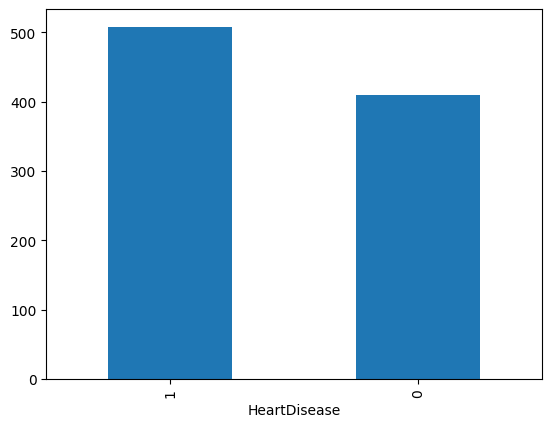

In [13]:
df['HeartDisease'].value_counts().plot(kind='bar')

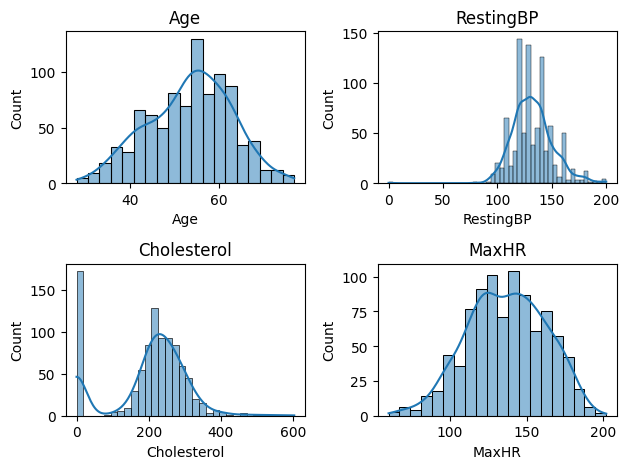

In [17]:
#distribution of numerical variables
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)
  plt.title(var)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout() #wrong value of 0 in resting bp in data even after and 0 cholestrol also not possible

In [20]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()#cholestrol is again written after comma as to specifically target these column values

In [21]:
ch_mean

np.float64(244.6353887399464)

In [23]:
# now replacing 0 cholestrol levels with a mean cholestrol level
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean).round(2)

,Cholesterol
0,289.0
1,180.0
2,283.0
3,214.0
4,195.0
...,...
913,264.0
914,193.0
915,131.0
916,236.0


In [25]:
restingbp_mean=df.loc[df['RestingBP']!=0,'Cholesterol'].mean()

np.float64(244.63624863685934)

In [27]:
df['RestingBP']=df['RestingBP'].replace(0,ch_mean).round(2)

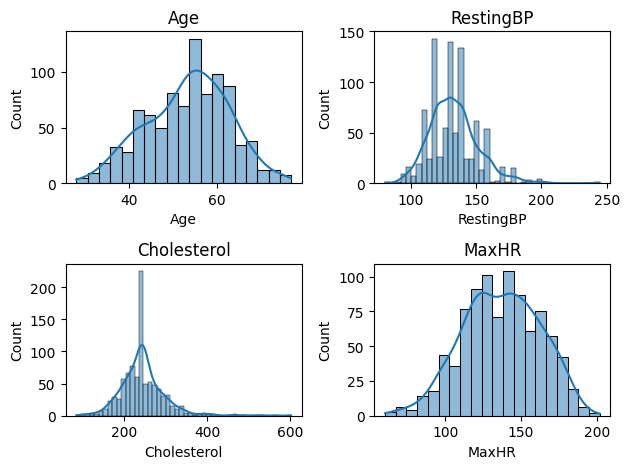

In [28]:
#distribution of numerical variables
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)
  plt.title(var)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [31]:
!pip install sheryanalysis==0.1.0

In [35]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report


INFO:sheryanalysis:
🔍 Basic Analysis Report


------------------------------------------------------------


INFO:sheryanalysis:------------------------------------------------------------


📏 Shape: (918, 12)


INFO:sheryanalysis:📏 Shape: (918, 12)


🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


INFO:sheryanalysis:🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']



✅ No null values found


INFO:sheryanalysis:
✅ No null values found



🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


INFO:sheryanalysis:
🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']



🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


INFO:sheryanalysis:
🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

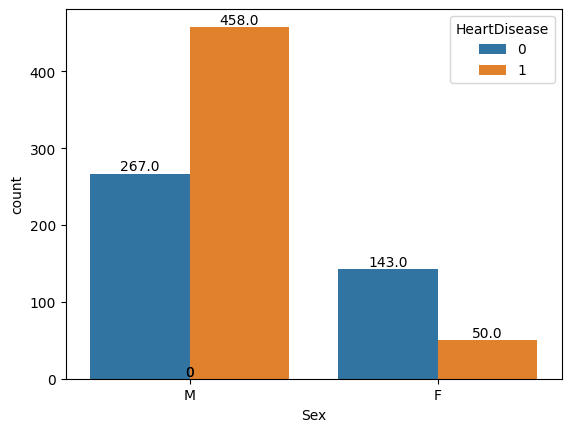

In [45]:
ax=sns.countplot(x=df['Sex'],hue=df['HeartDisease'])
for p in ax.patches:
   ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

<Axes: xlabel='ChestPainType', ylabel='count'>

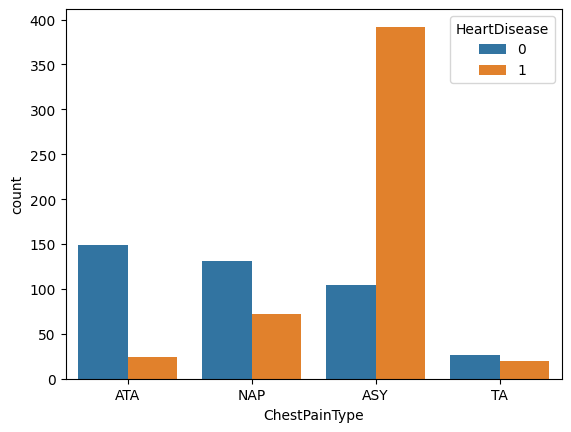

In [44]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

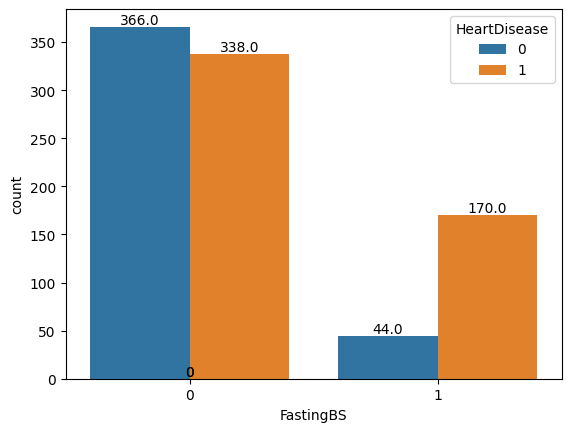

In [47]:
ax=sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])
for p in ax.patches:
   ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

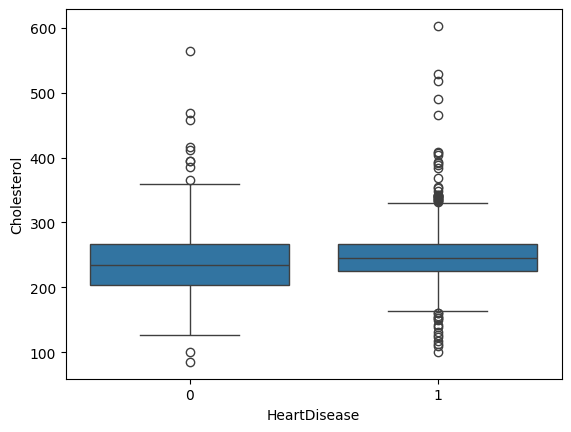

In [48]:
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'])

Based on the boxplot, here are some conclusions we can draw regarding the relationship between Cholesterol and HeartDisease:

Higher Median Cholesterol in Heart Disease Patients: It appears that individuals with HeartDisease (represented by 1 on the x-axis) generally have a higher median Cholesterol level compared to those without HeartDisease (represented by 0).
Broader Distribution for Heart Disease Patients: The box for HeartDisease = 1 seems to be wider, suggesting a greater variability or spread in Cholesterol levels among individuals with heart disease than in the healthy group.
Presence of Outliers: There might be outliers (individual points) indicating unusually high or low Cholesterol levels in either group, which could be worth investigating further.
Overlap in Ranges: While medians differ, there's likely significant overlap in the overall ranges of Cholesterol levels between the two groups, meaning that a high cholesterol level alone doesn't definitively indicate heart disease, and a lower one doesn't guarantee its absence.

<Axes: xlabel='HeartDisease', ylabel='Age'>

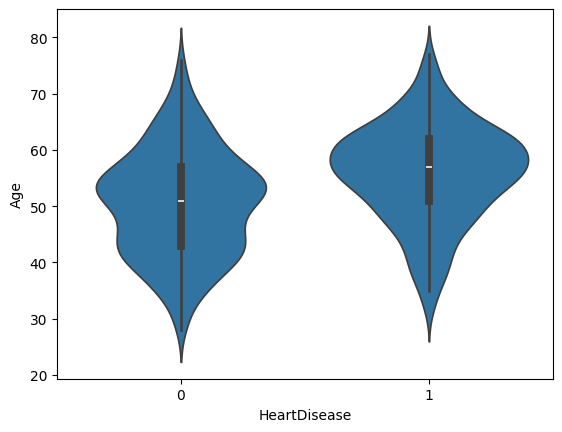

In [50]:
sns.violinplot(x=df['HeartDisease'],y=df['Age'])

<Axes: >

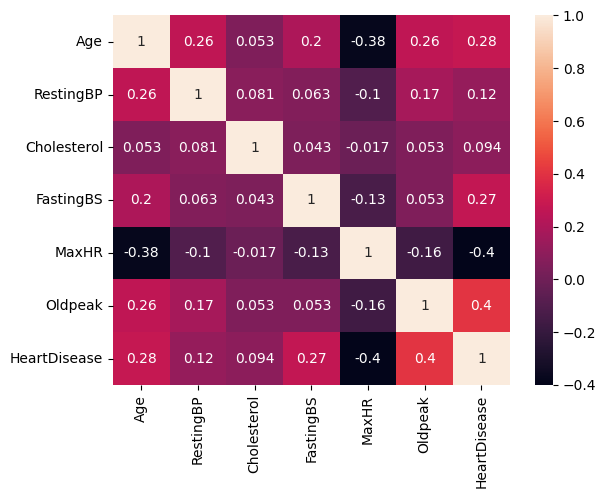

In [51]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#DataPREPROCESSING AND CLEANING

In [53]:
df_encode=pd.get_dummies(df)

In [54]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

In [55]:
df_encode=df_encode.astype(int)

In [56]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [60]:
from sklearn.preprocessing import StandardScaler
numerical=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler=StandardScaler()
df_encode[numerical]=scaler.fit_transform(df_encode[numerical])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.399826,0.834754,0,1.382928,-0.727592,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.489614,-1.210675,0,0.754157,0.282891,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.145068,0.722161,0,-1.525138,-0.727592,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.290847,-0.572651,0,-1.132156,0.282891,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.944720,-0.929194,0,-0.581981,-0.727592,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
